In [2]:

import pandas as pd


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate , train_test_split , StratifiedShuffleSplit,cross_val_score,GridSearchCV
from sklearn import   linear_model, metrics
from sklearn.linear_model import SGDClassifier as SGD
from sklearn.metrics import roc_auc_score

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats.mstats import winsorize

In [4]:
data_directory = "D:\\temp\\Xsolla1.csv"

data = pd.read_csv(data_directory, header=0 )

data['y'] = [1 if y == 'yes' else 0 for y in data['y']]

In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [6]:
data.shape

(3222, 21)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 21 columns):
age               3222 non-null int64
job               3222 non-null object
marital           3222 non-null object
education         3222 non-null object
default           3222 non-null object
housing           3222 non-null object
loan              3222 non-null object
contact           3222 non-null object
month             3222 non-null object
day_of_week       3222 non-null object
duration          3222 non-null int64
campaign          3222 non-null int64
pdays             3222 non-null int64
previous          3222 non-null int64
poutcome          3222 non-null object
emp.var.rate      3222 non-null float64
cons.price.idx    3222 non-null float64
cons.conf.idx     3222 non-null float64
euribor3m         3222 non-null float64
nr.employed       3222 non-null float64
y                 3222 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usage: 528.7+ KB


In [8]:
# нет null значений

In [9]:
X = data.drop(['y'],axis=1)   
y = data.y


In [10]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


In [11]:
X.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.00000,3222.000000,3222.000000,3222.000000,3222.000000
mean,39.949100,254.391682,2.525140,961.075729,0.191186,0.09162,93.587576,-40.580261,3.618885,5166.177654
std,10.292639,253.617387,2.546888,190.390725,0.552781,1.55203,0.578841,4.575879,1.734232,74.028498
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.40000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.80000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.10000,93.876000,-41.800000,4.857000,5191.000000
75%,47.000000,314.000000,3.000000,999.000000,0.000000,1.40000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.40000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [13]:
#посмотрим на некоторые фичи отдельно

In [14]:
y.value_counts()

0    2860
1     362
Name: y, dtype: int64

In [15]:
X.default.value_counts()


no         2581
unknown     641
Name: default, dtype: int64

In [16]:
X.marital.value_counts()
# 11 неизвестных в столбце "marital". 0.3% от всех данных. количественную переменную можно было бы заполнить mean значением. 
# может просто дропнуть эти 11 строк? пока оставим

married     1966
single       904
divorced     341
unknown       11
Name: marital, dtype: int64

In [17]:
X.pdays.value_counts()

999    3099
3        41
6        33
4        11
7         9
10        6
12        4
5         4
2         3
1         2
18        2
15        2
0         2
16        1
19        1
9         1
11        1
Name: pdays, dtype: int64

In [18]:
#'999 means client was not previously contacted'
#"999" - слишком далеко от всех остальных значений. может повлиять на работу модели. 
#но если заменить эти значения на другие(например -1), то возможно может нарушиться логика, т.к. это не категориальная переменная

#делаем категориальную переменную

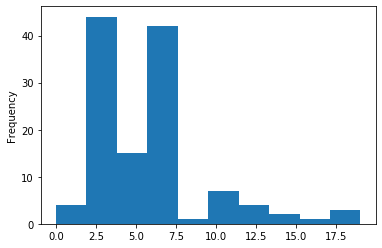

In [19]:
X[X['pdays'] != 999].pdays.plot(kind='hist')

In [20]:
#разбиваем 

In [21]:
X.loc[(X['pdays'] >= 0) & (X['pdays'] <= 2), 'pdays'] = 2
X.loc[(X['pdays'] > 2) & (X['pdays'] <= 5), 'pdays'] = 3
X.loc[(X['pdays'] > 5) & (X['pdays'] <= 8), 'pdays'] = 4
X.loc[(X['pdays'] > 8) & (X['pdays'] != 999) , 'pdays'] = 5 

X.loc[(X['pdays'] == 999), 'pdays'] = 1

In [22]:
# умные люди советовали проверять не потерялись ли значения. проверяем

In [23]:
X.pdays.value_counts()

1    3099
3      56
4      42
5      18
2       7
Name: pdays, dtype: int64

In [24]:
X.pdays.count()

3222

In [25]:
X.age.unique()


array([30, 39, 25, 38, 47, 32, 41, 31, 35, 36, 29, 27, 44, 46, 45, 50, 55,
       40, 28, 34, 33, 51, 48, 20, 76, 56, 24, 58, 60, 37, 52, 42, 49, 54,
       59, 57, 43, 53, 75, 82, 71, 21, 22, 23, 26, 81, 61, 67, 73, 18, 64,
       74, 77, 86, 85, 63, 88, 78, 72, 68, 80, 66, 19, 62, 65, 69, 70],
      dtype=int64)

In [26]:
X.age.unique().shape

(67,)

Text(0, 0.5, 'Count')

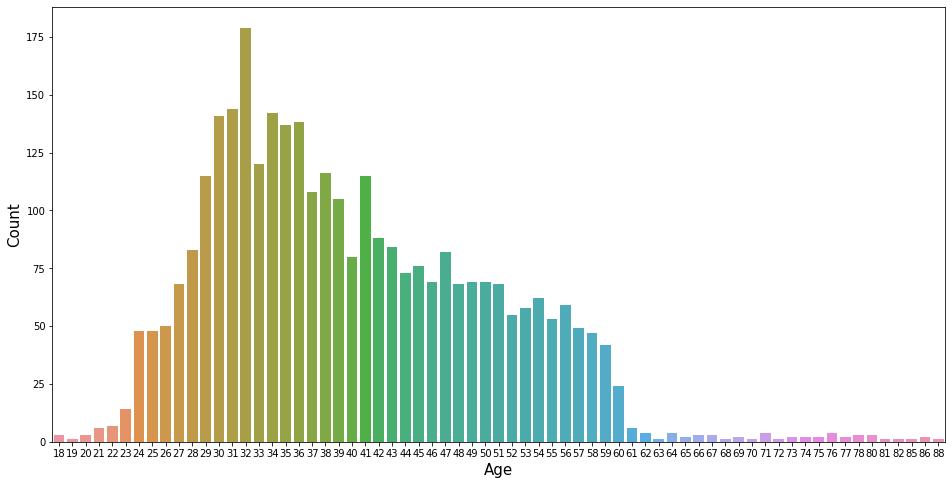

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)
sns.countplot(x = 'age', data = X)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)


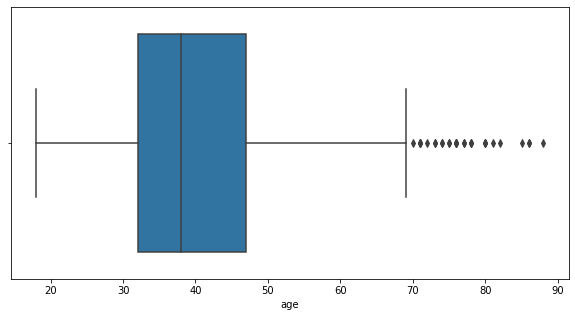

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
ax = sns.boxplot(x=data["age"])

In [29]:
# ограничим выбросы по возрасту

In [30]:
print ('max- ',X.age.max())
print ('min- ',X.age.min())
print ('count- ',X.age.count())
print('unique- ',X.age.unique().shape)

max-  88
min-  18
count-  3222
unique-  (67,)


In [31]:
X.age = list(winsorize(X.age, limits = 0.03))

In [32]:
print ('max- ',X.age.max())
print ('min- ',X.age.min())
print ('count- ',X.age.count())
print('unique- ',X.age.unique().shape)

max-  59
min-  25
count-  3222
unique-  (35,)


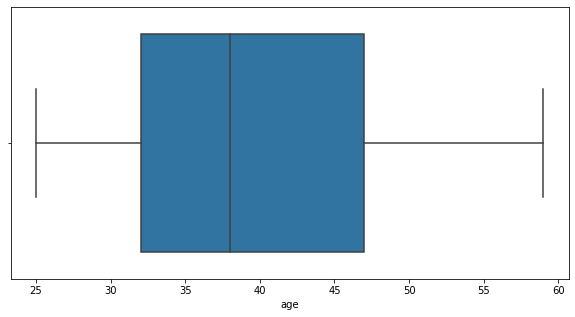

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
ax = sns.boxplot(x=X["age"])

In [34]:
# оцифровываем категориальные переменные
categorical_column = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
                      'day_of_week', 'poutcome']

for i in categorical_column:
    le = LabelEncoder()
    X[i] = le.fit_transform(X[i])
print(X.head())

   age  job  marital  education  default  housing  loan  contact  month  \
0   30    1        1          2        0        2     0        0      6   
1   39    7        2          3        0        0     0        1      6   
2   25    7        1          3        0        2     0        1      4   
3   38    7        1          2        0        1     1        1      4   
4   47    0        1          5        0        2     0        0      7   

   day_of_week  duration  campaign  pdays  previous  poutcome  emp.var.rate  \
0            0       487         2      1         0         1          -1.8   
1            0       346         4      1         0         1           1.1   
2            4       227         1      1         0         1           1.4   
3            0        17         3      1         0         1           1.4   
4            1        58         1      1         0         1          -0.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0          92.8

In [35]:
clf = RandomForestClassifier()

In [36]:
#отделение тестовой выборки
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=42)
sss.get_n_splits(X, y)

5

In [37]:
for train_index, test_index in sss.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [38]:
#снова проверяем
y_train.value_counts().sum() + y_test.value_counts().sum()


3222

In [39]:
# параметры gridsearch 
params ={'n_estimators':range(10,30,3), \
         'max_depth': range(10,25,3), 'min_samples_leaf': range(3,8),'min_samples_split': range(2,10,2)}

In [40]:
grid = GridSearchCV(clf,params,n_jobs=-1,cv=sss,scoring='roc_auc')

In [41]:
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.25,
            train_size=None),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_s...
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_

In [42]:
grid.best_params_

{'max_depth': 13,
 'min_samples_leaf': 7,
 'min_samples_split': 6,
 'n_estimators': 25}

In [43]:
grid.best_score_

0.915172300263389

In [ ]:
# кросс валидация на лучшем классификаторе

In [44]:
best_clf=grid.best_estimator_

In [45]:
CV = cross_validate(best_clf, X_test, y_test, scoring='roc_auc', cv=sss)


In [46]:
CV

{'fit_time': array([0.04100037, 0.03200221, 0.02800179, 0.02442598, 0.02399278]),
 'score_time': array([0.00600004, 0.00500274, 0.00500059, 0.00459027, 0.0045979 ]),
 'test_score': array([0.94656303, 0.92640272, 0.93927617, 0.94364829, 0.93368958])}

In [47]:
CV_mean = CV['test_score'].mean()

In [48]:
CV_mean

0.9379159582220062

In [ ]:
# средний roc_auc по 5 фолдам

In [ ]:
#  0.9379159582220062

In [ ]:
# разбить возраст на группы. рамки групп посчитать через квантили 

# подумать что делать с unknown значениями

# подробнее поработать с каждой фичей

# попробовать другие модели обучения и сравнить результаты

# откалибровать предиктор.( это классификация, результаты выставляются с определённой вероятностью.
# границы вероятности можно менять в завимости от задачи. что важнее в данном случае: precision или recall?)

# построить много очень красивых графиков